AUTHOR: SAINA GHOSH
# Problem Statement: Task-1
**Predict the percentage of students based on the number of study hours.**
* Dataset: http://bit.ly/w-data 


In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Reading the csv file (data file)
link = "http://bit.ly/w-data"
read_data = pd.read_csv(link)
print("Imported Successfully")

#Know the number of rows and columns of the data file
read_data.shape

Imported Successfully


(25, 2)

**Displaying The Data**

In [2]:
#Print the data as per the number of rows you get above
read_data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Visualizing The Data**

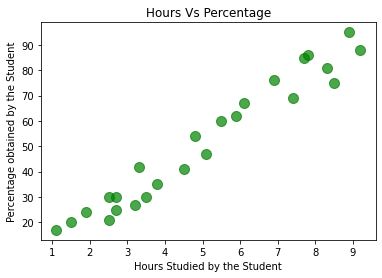

In [3]:
x = list(read_data['Hours'])
y = list(read_data['Scores'])
plt.scatter(x, y, c='green', s=100, alpha=0.7)
plt.xlabel('Hours Studied by the Student')
plt.ylabel('Percentage obtained by the Student')
plt.title('Hours Vs Percentage')
plt.show()

**Preparing the Data**
>KFold cross validation is used for distributing the data into training set and test set.




In [4]:
from sklearn.model_selection import KFold 
dataX = read_data.iloc[:, :-1].values  
dataY = read_data.iloc[:, 1].values  
#prepare cross validatation
kfold=KFold(5,shuffle=True,random_state=1)
#enumerate splits
for train_ix, test_ix in kfold.split(dataX):
  #select rows for train and test
  trainX,trainY,testX,testY = dataX[train_ix],dataY[train_ix],dataX[test_ix],dataY[test_ix]


**Training the Data**

In [6]:
from sklearn.linear_model import LinearRegression  
#define model
model=LinearRegression()
#fit model
model.fit(trainX,trainY)
print("Training Complete")

Training Complete


**Equation to plot the regression line**

> Y = mX + c

* y --> dependant variable
* m --> slope of line
* X --> independant variable
* c --> y-intercept




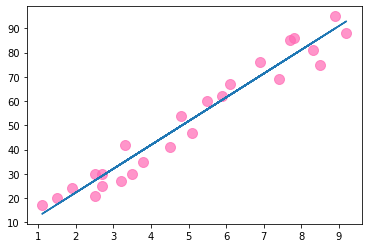

In [7]:
line = model.coef_*dataX + model.intercept_

# Plotting for the test data
plt.scatter(dataX, dataY, c='hotpink', s=100, alpha=0.7)
plt.plot(dataX, line);
plt.show()

**Predicting the Data**

In [8]:
#Displaying the test data that would be used for prediction
print(testX)
pred_Y = model.predict(testX)


[[1.5]
 [8.3]
 [2.7]
 [5.9]
 [4.5]]


In [9]:
#Changing the dimension of the test data and storing in another variable 
import copy
t_X = copy.deepcopy(testX)
t_X.shape=(5,)

#Displaying the difference between the actual output and predicted output
df = pd.DataFrame({'Hours':t_X, 'Actual Percentage': testY, 'Predicted Percentage': pred_Y})  
df

,Hours,Actual Percentage,Predicted Percentage
0,1.5,20,17.380813
1,8.3,81,84.101937
2,2.7,25,29.155129
3,5.9,62,60.553305
4,4.5,41,46.816603


**Testing the predictions on manually inserted data**

In [10]:
h = np.array([[8.8]])
p = model.predict(h)
print('Hours: ', int(h) , ' --->  Predicted Percentage: ', int(p))

Hours:  8  --->  Predicted Percentage:  89


**Model Evaluation**

In [11]:
# Calculation of Mean Squared Error (MSE) 
from sklearn.metrics import mean_squared_error 
print("Mean Squared Error: {:.2f}".format(mean_squared_error(testY,pred_Y))) 

Mean Squared Error: 13.93


In [12]:
# Calculation of Root Mean Squared Error (RMSE) 
from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error: {:.2f}".format(np.sqrt(mean_squared_error(testY,pred_Y))))

Root Mean Squared Error: 3.73


In [13]:
# Calculation of Mean Absolute Error (MAE) 
from sklearn import metrics  
print("Mean Absolute Error: {:.2f}".format(metrics.mean_absolute_error(testY,pred_Y)))

Mean Absolute Error: 3.43
